# In the name of God

pattern recognition project 1

#Import Libraries
Here import the libraries we will be using in this project


In [ ]:
import time
import gzip
import numpy as np
from sklearn import tree
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import decomposition
from sklearn.model_selection import KFold 
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_validate
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc,roc_auc_score

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
plt.style.use('seaborn')

!pip install scikit-plot
import scikitplot as skplt

#Prepare Data

##Download MNIST dataset

In the first step, we will download the MNIST dataset from http://yann.lecun.com/.


In [ ]:
!wget 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
!wget 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz'
!wget 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz'
!wget 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'

--2021-12-19 16:13:39--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz.2’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.1s    

2021-12-19 16:13:39 (74.3 MB/s) - ‘train-images-idx3-ubyte.gz.2’ saved [9912422/9912422]

--2021-12-19 16:13:39--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz.2’

train-labels-idx1-u 100%[===

##Load data to np array

Read the file data and convert it to a numpy array. 

This function returns two arrays, one for images and the other for labels.

In [ ]:
def load_mnist(images, labels, num, dim = 28*28):
    data = np.zeros(num * dim, dtype=np.uint8).reshape((num, dim))
    data_label = np.zeros(num, dtype=np.uint8).reshape((num, ))

    with gzip.open(images, 'rb') as f_images,\
            gzip.open(labels, 'rb') as f_labels:
        
        #size: The number of bytes to return. 
        f_images.read(16)
        f_labels.read(8)
        for i in np.arange(num):
            # f_labels :  b'\x07\x02\x01\x00\x04\x01\x04\t\x05\t\x00\x06\t\x00\x01\x05\t\x07\x03\x04\t\
            #ord() function returns the Unicode code from a given character. 
            data_label[i] = ord(f_labels.read(1))

            for j in np.arange(dim):
                data[i, j] = ord(f_images.read(1))
    return data, data_label


##Scale data

In this function, we scale the data in the range of 0-1 to increase the speed of training.

In [ ]:
def scale_data(train_images, test_images, num_train_data, num_test_data, dim = 28*28):

    x_train = train_images.reshape((num_train_data, dim))
    x_train = x_train.astype('float32')/255

    x_test = test_images.reshape((num_test_data, dim))
    x_test = x_test.astype('float32')/255
    
    return (x_train, x_test)

##Dimension reduction with PCA

With the help of pca, we reduce the dimensions. In other words, we reduce the number of features. 

We use the pca function from sklearn.decomposition.PCA.  

We use the fit_transform function to fit the data and transform it. 

In [ ]:
def dimension_reduction(x_train, x_test, n_component=40):
    #Make an instance of the Model
    pca = decomposition.PCA(n_component)
    
    #Fit PCA on training set. Note: you are fitting PCA on the training set only
    pca.fit(x_train)

    #Apply the mapping (transform) to both the training set and the test set.
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)  

    return  x_train, x_test

#Classification Method

##Support Vector Machine (SVM)

In [ ]:
def SVM_classifier(kernel='rbf'):
    if kernel == 'rbf':
        return OneVsRestClassifier(SVC(C=200,kernel=kernel ,gamma=0.01,cache_size=1000))
    
    return LinearSVC(multi_class='ovr', max_iter=8000)

##Decision Tree

In [ ]:
def decision_tree_classifier(max_depth=10):

    return DecisionTreeClassifier()


#Evaluate Model

We report the values of each of the above metrics and draw the roc curve for each classifier.

We also report the mean and standard deviation of accuracy, precision, recall, f1, auc and AUC score.

**To evalute model performance, we calculate accuracy, precision, recall, f1 score, confusion matrix, roc curve, and AUC.**


*   To calculate accuracy, we use the accuracy_score function from sklearn.metrics.
*   To calculate confusion matrix, we use the confusion_matrix function from sklearn.metrics.
*   To calculate roc curve, we use the roc_curve function from sklearn.metrics.
*   To calculate auc, we use the auc function from sklearn.metrics.


##Confusion Matrix

In [ ]:
def confusion_matrix_(test_labels, predicted_labels):
    print("\nconfusion_matrix\n")
    cm = confusion_matrix(test_labels, predicted_labels)
    plt.subplots(figsize=(10, 6))
    sn.heatmap(cm, annot = True, fmt = 'd', cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

##ROC curve, AUC score













In [ ]:
def roc_curve_acu(test_labels, predicted_labels):
    classes = np.arange(0, 10, 1)
    y_test_binary = label_binarize(test_labels, classes=classes)

    y_hat_binary = label_binarize(predicted_labels, classes=classes)
    false_positive_rate = {}
    true_positive_rate = {}
    auc_score = {}
    
    num_class = len(classes)
    for i in range(num_class):
        false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_test_binary[:, i], y_hat_binary[:, i])
        auc_score[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
    mean = np.mean(list(auc_score.values()))
    std = np.std(list(auc_score.values()))
    auc_score['mean'] = mean
    auc_score['Standard deviation'] = std
    
    # Plot of a ROC curve for a specific class
    print("\n----- ROC corve------\n")
    plt.figure()
    for i in range(num_class):
        # plt.figure()
        plt.plot(false_positive_rate[i], true_positive_rate[i],linestyle='--', label='ROC curve label {} vs. others (area = {:.02f})'.format(i, auc_score[i]))
        plt.plot([0, 1], [0, 1], 'k--')

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve class {}'.format(i))
        plt.title('ROC curve')
        plt.legend(loc="lower right")
    plt.show()
    
    df_auc_score = pd.DataFrame({'class' : auc_score.keys(),\
                              'AUC Score': auc_score.values()})

    return df_auc_score

In [ ]:
def skplt_roc_curve(y_test, y_probabilities):
    skplt.metrics.plot_roc(y_test, y_probabilities)
    plt.show()

## accuracy, recall, precision, f1_score.

In [ ]:
def evaluate_classifier(test_labels, predicted_labels):
    report = classification_report(test_labels, predicted_labels, output_dict=True)
    report['mean'] = report.pop('macro avg')
    
    df_temp = pd.DataFrame(report).transpose()
    report['Standard deviation'] = {}
    for colunm_name in ['precision', 'recall', 'f1-score']:
        report['Standard deviation'][colunm_name] = np.std(df_temp[colunm_name][0:10])
    report['Standard deviation']['support'] = ' '
    
    df_report = pd.DataFrame(report).transpose().drop('accuracy')

    confusion_matrix_(test_labels, predicted_labels)
    
    auc_score = roc_curve_acu(test_labels, predicted_labels)
    accuracy = accuracy_score(test_labels, predicted_labels)
    
    return df_report, auc_score, accuracy

#Train Classifier

In [ ]:
'''
    In this function, we first call the load_mnist function to load the data.
    Loaded data are split into train and test data.
    Then we scale the label in range 0 to 1 to increase the speed of training.
    At the end the data is ready to use.
'''
def initial_data_preparation():
    train_images_file = 'train-images-idx3-ubyte.gz'
    train_labels_file = 'train-labels-idx1-ubyte.gz'
    num_train_data = 60000
    test_images_file = 't10k-images-idx3-ubyte.gz'
    test_labels_file = 't10k-labels-idx1-ubyte.gz'
    num_test_data = 10000

    start_time = time.time()
    print('Converting data ..')
    train_images, train_labels = load_mnist(train_images_file,\
                                            train_labels_file, num_train_data)
    
    test_images, test_labels = load_mnist(test_images_file,\
                                          test_labels_file, num_test_data)

    print('Data is ready in {} second'.format(str(time.time() - start_time)))
    
    train_images, test_images = scale_data(train_images, test_images,\
                                                    num_train_data, num_test_data)
    return train_images, train_labels, test_images, test_labels


In [ ]:
def main(pca_reduction, cross_validiation, n_component_pca, classifier, SVM_kernel, 
         train_images, train_labels, test_images, test_labels, k=5):
    
    
    if pca_reduction:
       train_images, test_images = dimension_reduction(train_images, test_images, n_component_pca)
    
    start_time = time.time()

    classifier_instance = None
    label_probabilities = None
    
    if classifier == 'SVM':
        classifier_instance = SVM_classifier(kernel=SVM_kernel)

    elif classifier == 'DT':
        classifier_instance = OneVsRestClassifier(decision_tree_classifier(max_depth=10))
    else :
        print("choose classifier Support Vector Machine (SVM) or Decision Tree")
        return
    
    if cross_validiation:
        kf = KFold(n_splits=k)
        acc_score = []
        X = np.append(train_images, test_images, axis=0)
        y = np.append(train_labels, test_labels, axis=0)
        for train_index , test_index in kf.split(X):
            X_train , X_test = X[train_index] ,X[test_index]
            y_train , y_test = y[train_index] ,y[test_index]
            
            classifier_instance.fit(X_train,y_train)
            predicted_labels = classifier_instance.predict(X_test)
            
            acc = accuracy_score(predicted_labels , y_test)
            acc_score.append(acc)
            
        avg_acc_score = sum(acc_score)/k
        print(f"{k} fold cross validation ,accuracy : {avg_acc_score}")
        print("acc_score :: ", acc_score)
    
    else:
        classifier_instance.fit(train_images, train_labels)
        # Make predictions 
        predicted_labels = classifier_instance.predict(test_images)

        # if classifier == "SVM":
        #     label_probabilities = classifier_instance.decision_function(test_images)
   
    print('training time {} second'.format(str(time.time() - start_time)))
   
    return test_labels, predicted_labels, label_probabilities
    

#prepare data for experiment

In [ ]:
train_images, train_labels, test_images, test_labels = initial_data_preparation()

Converting data ..
Data is ready in 87.27464890480042 second


#Experiment report


##*SVM with rbf kernel*



- The SVM model with rbf kernel separates classes 
in the best possible way due to its nonlinear conversion.

- In this model, whether we use all the features or reduce the features with the help of PCA, we still get acceptable accuracy.

- The average accuracy of this model for all dimensions of input features is about 99%.
In the matrix configuration, the classifier function is well visible.

- For example, it can be seen that for svm with all the features in 9 cases, the image of 4 is incorrectly predicted as 9. It also estimated the number 7 to Samba 2 in 7 cases. Very comprehensive and good information can be retrieved from this matrix
The roc curve chart shows the positive to negative ratio.

- We reached an acceptable percentage for all labels.
Also, the criteria of precision, recalc, and F1 are valid for each class, as well as the mean and variance of all classes.

- The execution time for SVM with the rbf kernel is as follows:

    - Complete model (About 9 min) > PCA 100 (About 4 min) > PCA 40 (About 2 sec)

- The accuracy obtained is almost the same (About 99%).

- In order to check the model, in addition to the accuracy, the f1-measure is also suitable. The closer this  f1-measure is to 1 on classes and the smaller the standard deviation, the better the model we have.


###All feature, SVM, rbf kernel


training time 1597.4919302463531 second

confusion_matrix



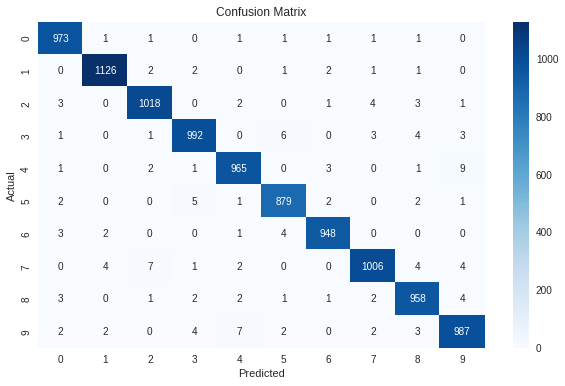


----- ROC corve------



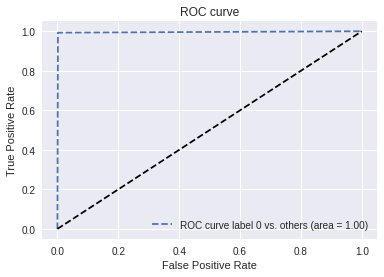

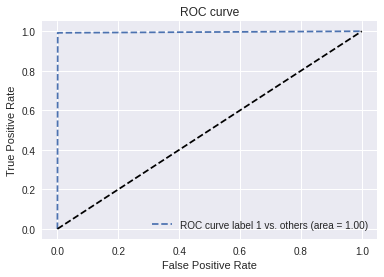

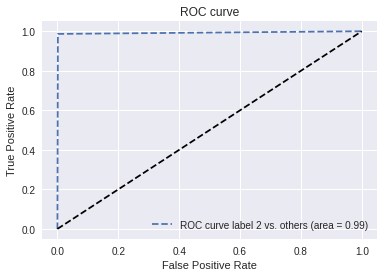

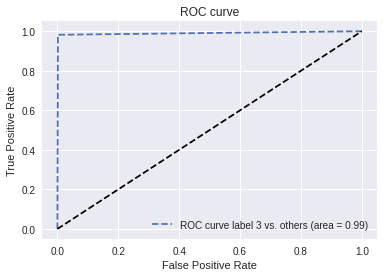

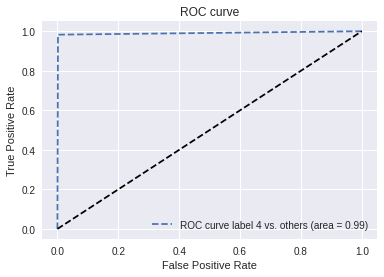

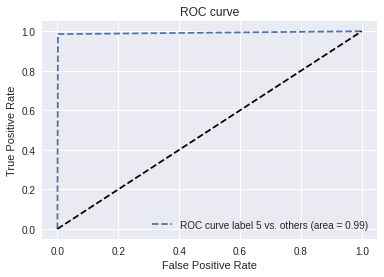

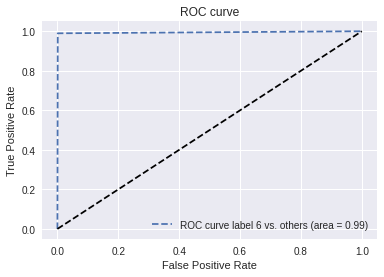

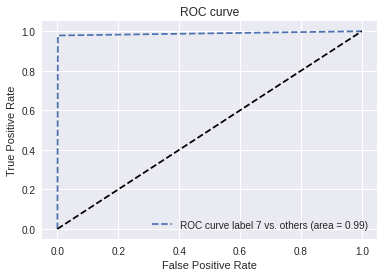

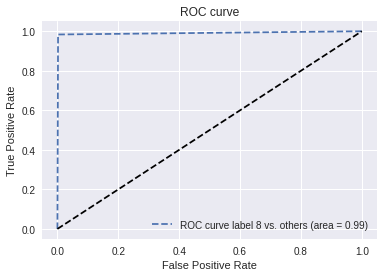

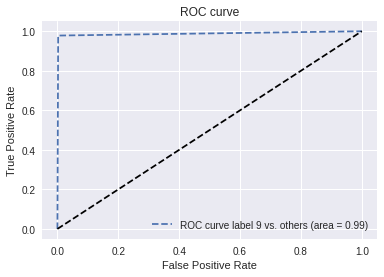

In [ ]:
y_test, y_pred, y_probabilities = main(pca_reduction=False, cross_validiation=False, \
                      n_component_pca='', classifier='SVM', SVM_kernel='rbf',\
                      train_images=train_images, train_labels=train_labels,\
                      test_images=test_images, test_labels=test_labels)
report_svm, auc_score_svm, accuracy_svm = evaluate_classifier(y_test, y_pred)

In [ ]:
print("accuracy : ", accuracy_svm)

accuracy :  0.9852


In [ ]:
report_svm

,precision,recall,f1-score,support
0,0.984818,0.992857,0.988821,980
1,0.99207,0.99207,0.99207,1135
2,0.986434,0.986434,0.986434,1032
3,0.985104,0.982178,0.983639,1010
4,0.98369,0.982688,0.983189,982
5,0.983221,0.985426,0.984323,892
6,0.989562,0.989562,0.989562,958
7,0.987242,0.978599,0.982902,1028
8,0.980553,0.983573,0.98206,974
9,0.978196,0.978196,0.978196,1009


In [ ]:
auc_score_svm

,class,AUC Score
0,0,0.995597
1,1,0.995528
2,2,0.992437
3,3,0.990255
4,4,0.990457
5,5,0.991890
6,6,0.994228
7,7,0.988575
8,8,0.990734
9,9,0.987875


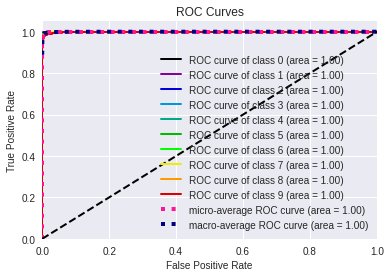

In [ ]:
skplt_roc_curve(y_test, y_probabilities)

###100 feature(PCA), SVM, rbf kernel

training time 279.887268781662 second

confusion_matrix



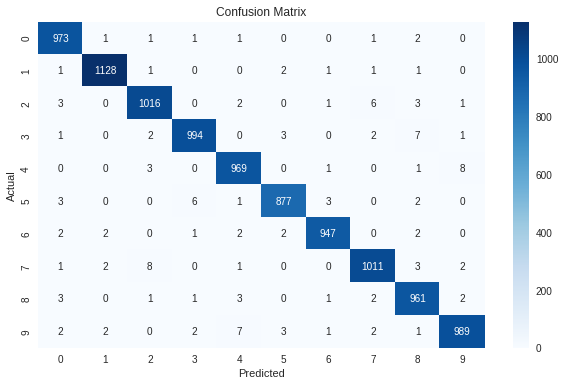


----- ROC corve------



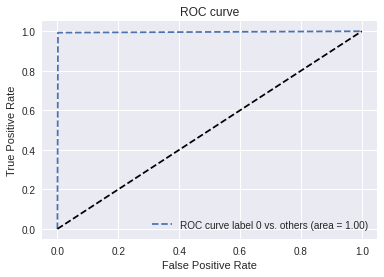

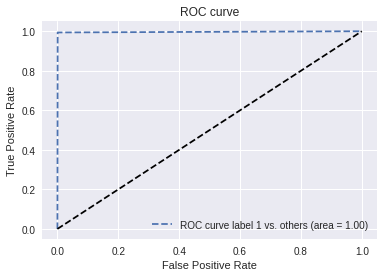

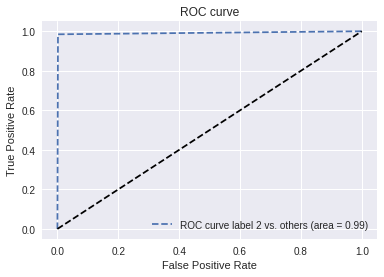

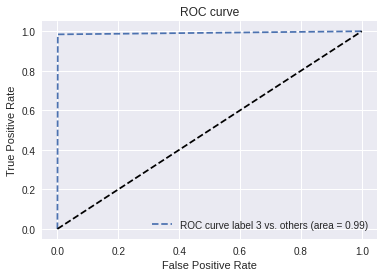

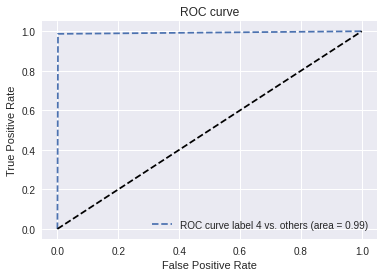

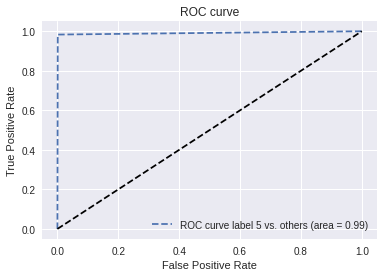

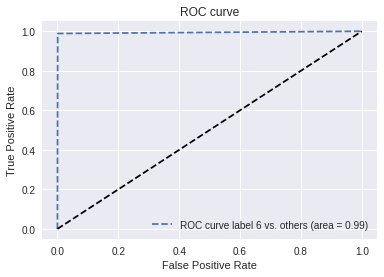

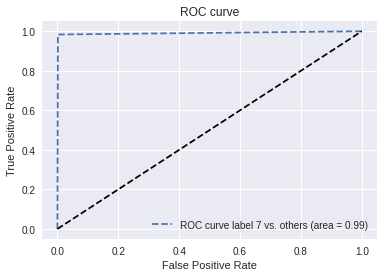

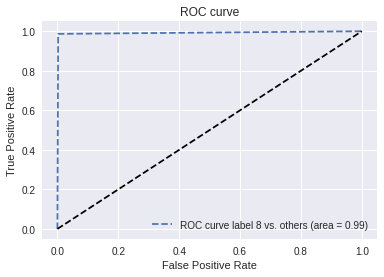

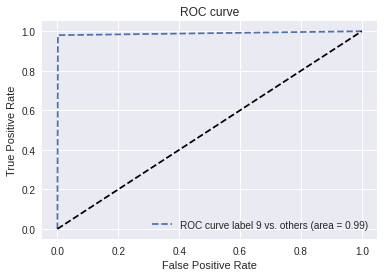

In [ ]:
y_test, y_pred, y_probabilities = main(pca_reduction=True, cross_validiation=False, \
                      n_component_pca=100, classifier='SVM', SVM_kernel='rbf',\
                      train_images=train_images, train_labels=train_labels,\
                      test_images=test_images, test_labels=test_labels)
report_svm_100, auc_score_svm_100, accuracy_svm_100 = evaluate_classifier(y_test, y_pred)

In [ ]:
print("accuracy : ", accuracy_svm_100)

accuracy :  0.9865


In [ ]:
auc_score_svm_100

,class,AUC Score
0,0,0.995542
1,1,0.996521
2,2,0.991356
3,3,0.991467
4,4,0.992438
5,5,0.991043
6,6,0.993816
7,7,0.990951
8,8,0.992108
9,9,0.989311


In [ ]:
auc_score_svm_100

,class,AUC Score
0,0,0.995542
1,1,0.996521
2,2,0.991356
3,3,0.991467
4,4,0.992438
5,5,0.991043
6,6,0.993816
7,7,0.990951
8,8,0.992108
9,9,0.989311


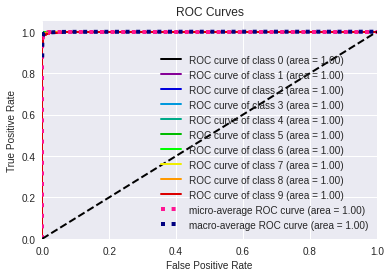

In [ ]:
skplt_roc_curve(y_test, y_probabilities)

###40 feature(PCA), SVM, rbf kernel


confusion_matrix



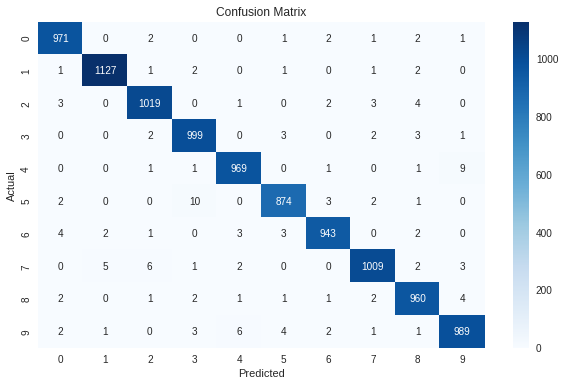


----- ROC corve------



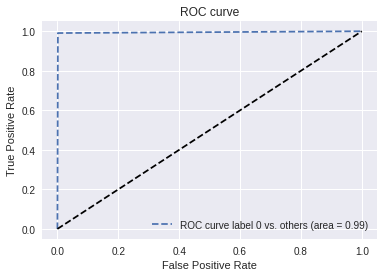

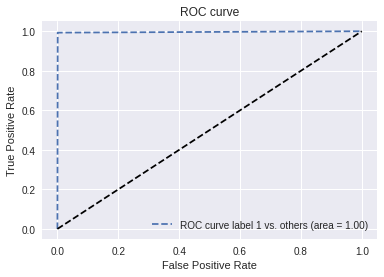

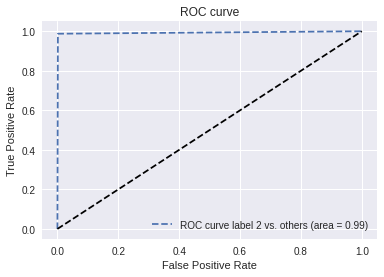

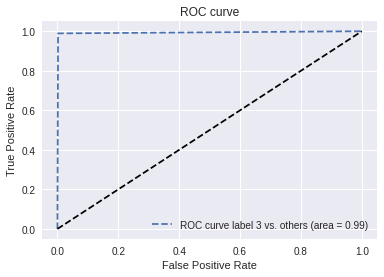

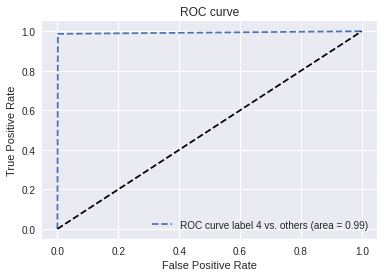

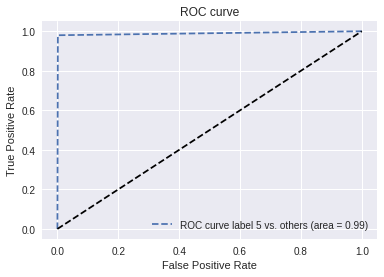

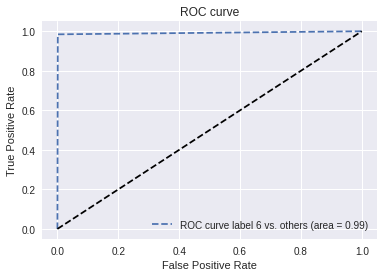

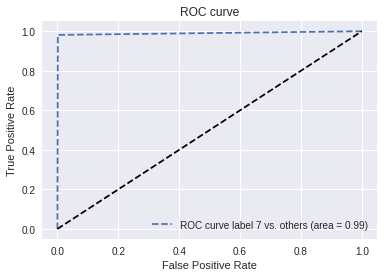

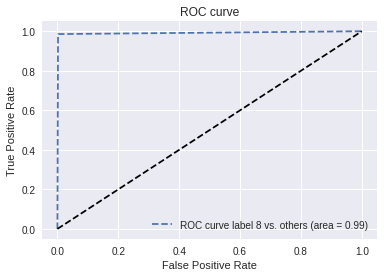

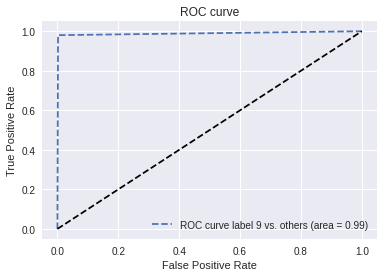

In [ ]:
y_test, y_pred, y_probabilities = main(pca_reduction=True, cross_validiation=False, \
                      n_component_pca=40, classifier='SVM', SVM_kernel='rbf',\
                      train_images=train_images, train_labels=train_labels,\
                      test_images=test_images, test_labels=test_labels)
report_svm_40, auc_score_svm_40, accuracy_svm_40 = evaluate_classifier(y_test, y_pred)

In [ ]:
print("accuracy : ", accuracy_svm_40)

accuracy :  0.986


In [ ]:
report_svm_40

,precision,recall,f1-score,support
0,0.985787,0.990816,0.988295,980
1,0.992952,0.992952,0.992952,1135
2,0.986447,0.987403,0.986925,1032
3,0.981336,0.989109,0.985207,1010
4,0.986762,0.986762,0.986762,982
5,0.985344,0.979821,0.982574,892
6,0.98847,0.984342,0.986402,958
7,0.988247,0.981518,0.984871,1028
8,0.981595,0.985626,0.983607,974
9,0.982125,0.980178,0.981151,1009


In [ ]:
auc_score_svm_40

,class,AUC Score
0,0,0.994632
1,1,0.996025
2,2,0.992921
3,3,0.993498
4,4,0.992660
5,5,0.989197
6,6,0.991563
7,7,0.990090
8,8,0.991816
9,9,0.989088


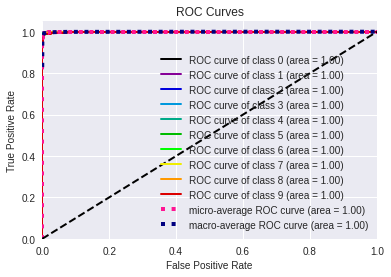

In [ ]:
skplt_roc_curve(y_test, y_probabilities)

##*SVM with linear kernel*

- In SVM with the linear kernel, the execution time of all cases is the same as SVM with the rbf kernel.
Also, due to the fact that we do not have nonlinear conversion, the accuracy of all cases with the rbf kernel has been reduced and the accuracy has reached about 90%. We use linearSVC to speedup 

- In this part, LinearSVC was used to increase the execution speed.

- The execution time is as follows:

    - Complete model (About 8 min) > PCA 100 (About 4 min) > PCA 40 (About 2 min)

- In the SVM with a linear kernel, reducing the dimensions (feature using PCA) to a very small extent reduces the accuracy of the model.
- The accuracy time is as follows:

    - Complete model (About 91.83%) > PCA 100 (About 91.29%) > PCA 40 (About 89.53 %)


###All feature, SVM, linear kernel


training time 479.4123685359955 second

confusion_matrix



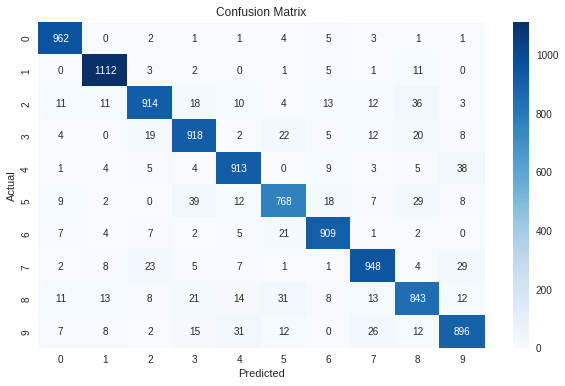


----- ROC corve------



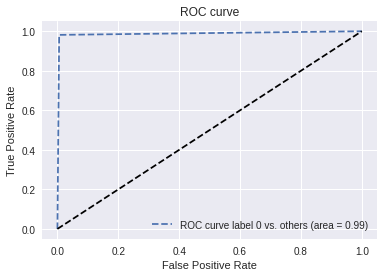

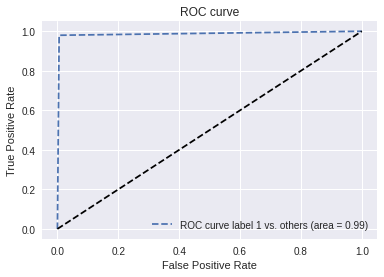

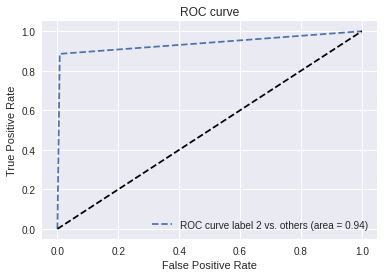

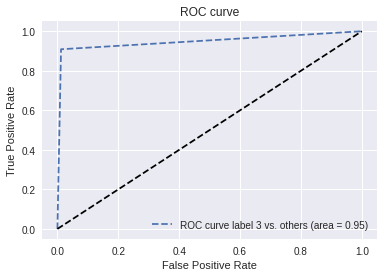

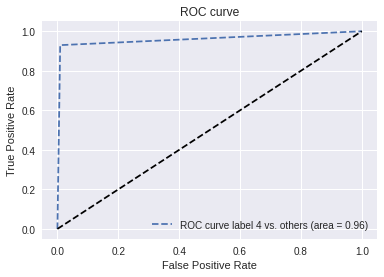

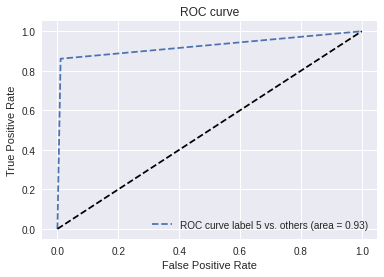

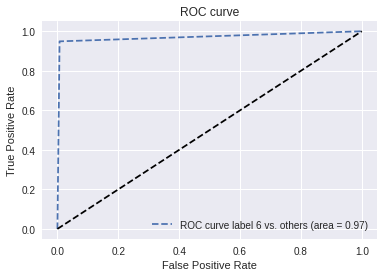

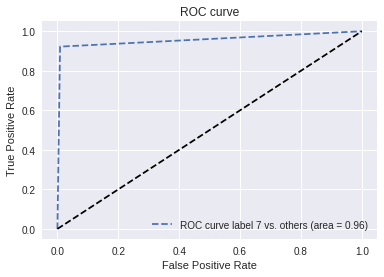

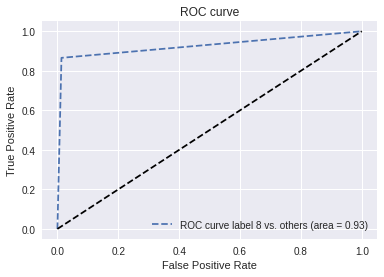

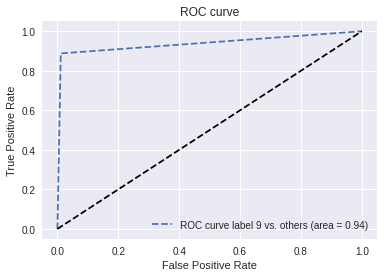

In [ ]:
y_test, y_pred, y_probabilities = main(pca_reduction=False, cross_validiation=False, \
                      n_component_pca='', classifier='SVM', SVM_kernel='linear',\
                      train_images=train_images, train_labels=train_labels,\
                      test_images=test_images, test_labels=test_labels)
report_svm_linear, auc_score_svm_linear, accuracy_svm_linear = evaluate_classifier(y_test, y_pred)

In [ ]:
print("accuracy : ", accuracy_svm_linear)

accuracy :  0.9183


In [ ]:
report_svm_linear

,precision,recall,f1-score,support
0,0.948718,0.981633,0.964895,980
1,0.956971,0.979736,0.968219,1135
2,0.929807,0.885659,0.907196,1032
3,0.89561,0.908911,0.902211,1010
4,0.917588,0.929735,0.923622,982
5,0.888889,0.860987,0.874715,892
6,0.934224,0.948852,0.941481,958
7,0.923977,0.922179,0.923077,1028
8,0.875389,0.865503,0.870418,974
9,0.900503,0.888008,0.894212,1009


In [ ]:
auc_score_svm_linear

,class,AUC Score
0,0,0.987934
1,1,0.987048
2,2,0.938982
3,3,0.948504
4,4,0.960321
5,5,0.925223
6,6,0.970887
7,7,0.956743
8,8,0.926104
9,9,0.938498


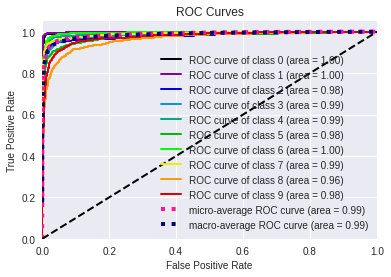

In [ ]:
skplt_roc_curve(y_test, y_probabilities)

###100 feature(PCA), SVM, linear kernel

training time 245.49274158477783 second

confusion_matrix



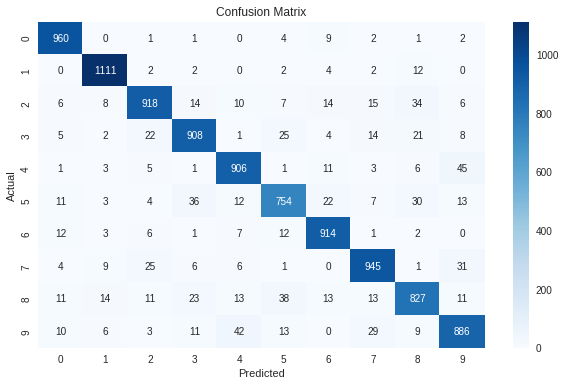


----- ROC corve------



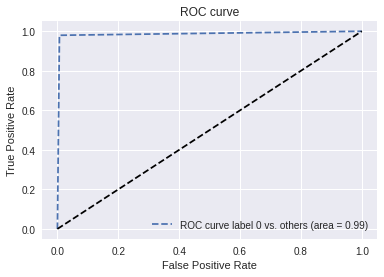

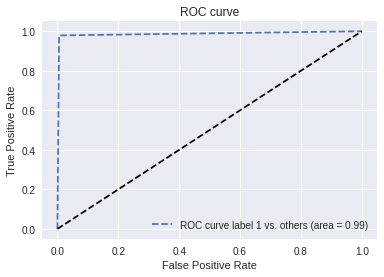

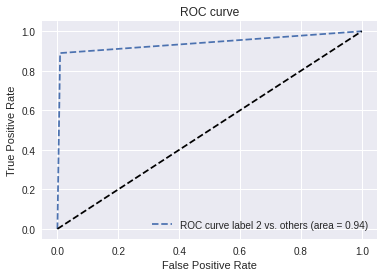

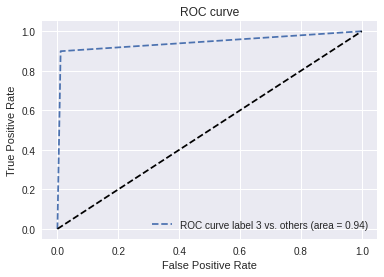

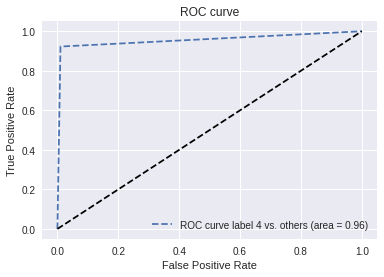

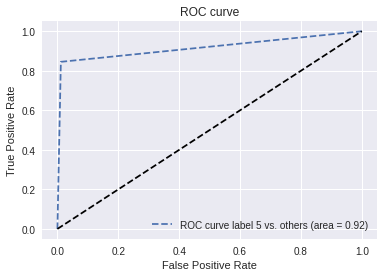

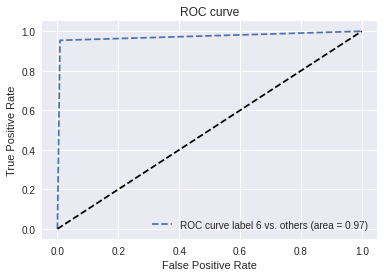

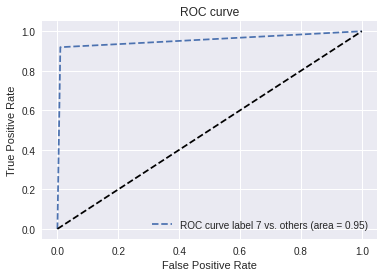

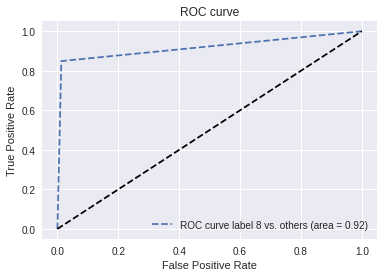

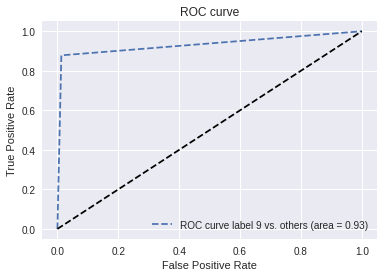

In [ ]:
y_test, y_pred, y_probabilities = main(pca_reduction=True, cross_validiation=False, \
                      n_component_pca=100, classifier='SVM', SVM_kernel='linear',\
                      train_images=train_images, train_labels=train_labels,\
                      test_images=test_images, test_labels=test_labels)
report_svm_linear_100, auc_score_svm_linear_100, accuracy_svm_linear_100 = evaluate_classifier(y_test, y_pred)

In [ ]:
print("accuracy : ", accuracy_svm_linear_100)

accuracy :  0.9129


In [ ]:
report_svm_linear_100

,precision,recall,f1-score,support
0,0.941176,0.979592,0.96,980
1,0.958585,0.978855,0.968614,1135
2,0.920762,0.889535,0.904879,1032
3,0.905284,0.89901,0.902136,1010
4,0.908726,0.922607,0.915614,982
5,0.879813,0.845291,0.862207,892
6,0.922301,0.954071,0.937917,958
7,0.916586,0.919261,0.917921,1028
8,0.876988,0.849076,0.862806,974
9,0.884232,0.878097,0.881154,1009


In [ ]:
auc_score_svm_linear_100

,class,AUC Score
0,0,0.986470
1,1,0.986720
2,2,0.940363
3,3,0.944221
4,4,0.956258
5,5,0.916991
6,6,0.972778
7,7,0.954838
8,8,0.918112
9,9,0.932598


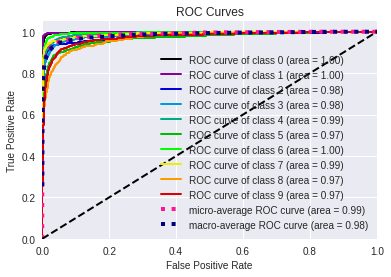

In [ ]:
skplt_roc_curve(y_test, y_probabilities)

###40 feature(PCA), SVM, linear kernel

training time 140.80067467689514 second

confusion_matrix



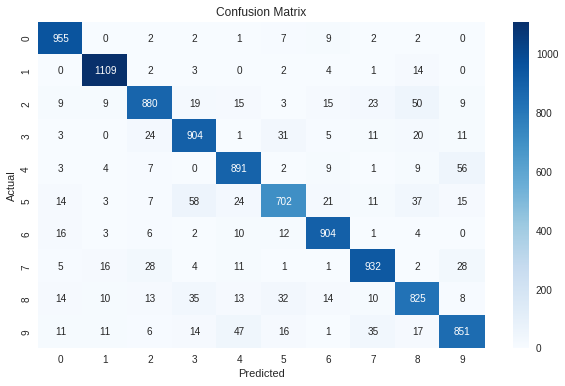


----- ROC corve------



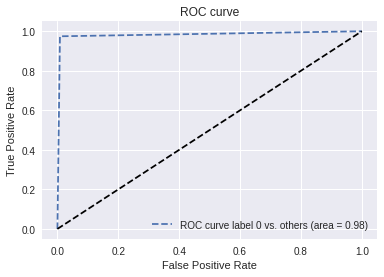

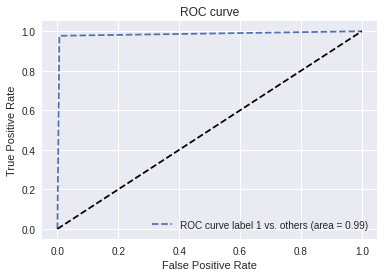

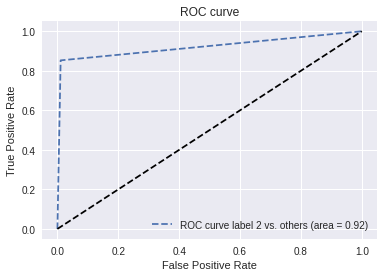

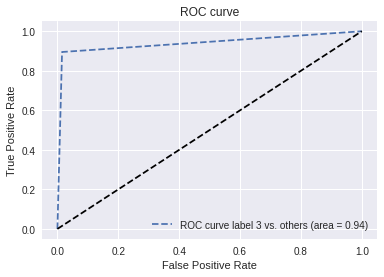

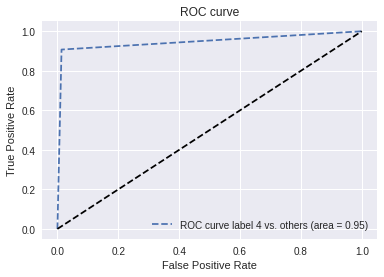

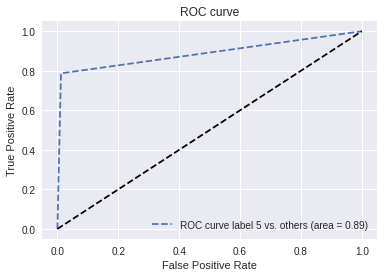

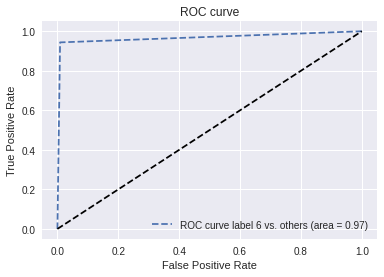

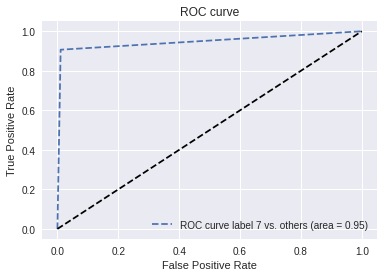

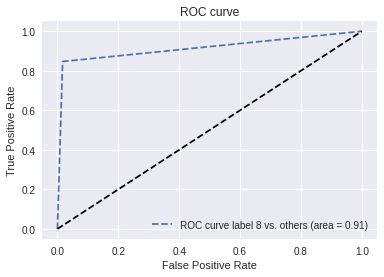

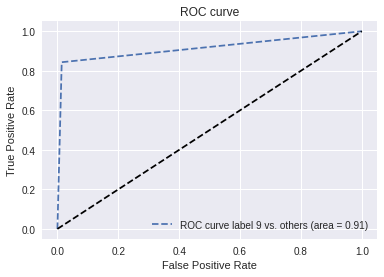

In [ ]:
y_test, y_pred, y_probabilities = main(pca_reduction=True, cross_validiation=False,\
                       n_component_pca=40, classifier='SVM', SVM_kernel='linear',\
                      train_images=train_images, train_labels=train_labels,\
                      test_images=test_images, test_labels=test_labels)
report_svm_linear_40, auc_score_svm_linear_40, accuracy_svm_linear_40 = evaluate_classifier(y_test, y_pred)

In [ ]:
print("accuracy : ", accuracy_svm_linear_40)

accuracy :  0.8953


In [ ]:
report_svm_linear_40

,precision,recall,f1-score,support
0,0.927184,0.97449,0.950249,980
1,0.951931,0.977093,0.964348,1135
2,0.902564,0.852713,0.876931,1032
3,0.868396,0.89505,0.881521,1010
4,0.879566,0.907332,0.893233,982
5,0.868812,0.786996,0.825882,892
6,0.919634,0.943633,0.931479,958
7,0.907498,0.906615,0.907056,1028
8,0.841837,0.847023,0.844422,974
9,0.870143,0.843409,0.856568,1009


In [ ]:
auc_score_svm_linear_40

,class,AUC Score
0,0,0.983087
1,1,0.985388
2,2,0.921060
3,3,0.939905
4,4,0.946902
5,5,0.887679
6,6,0.967448
7,7,0.948013
8,8,0.914925
9,9,0.914642


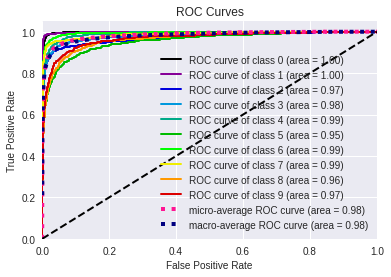

In [ ]:
skplt_roc_curve(y_test, y_probabilities)

##*Decision Tree*
- In the complete model of the Decision Tree, a large number of cases are estimated as the number 9, which of course is incorrect. This is the reason for the Precision 50 in this model for class 9, and the auc score for Class 2, 3 and 8 is the lowest of all.
- The smaller the number of input features, the lower the accuracy and quality of the model

- The accuracy time is as follows:

    - Complete model (About 85%) > PCA 40 (About 79%) > PCA 100 (About 78 %)


###All feature, Decision Tree


training time 208.99773502349854 second

confusion_matrix



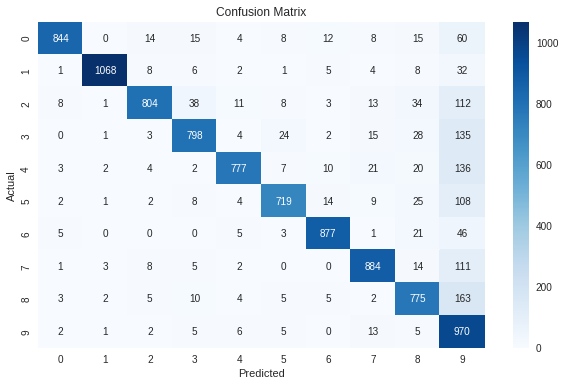


----- ROC corve------



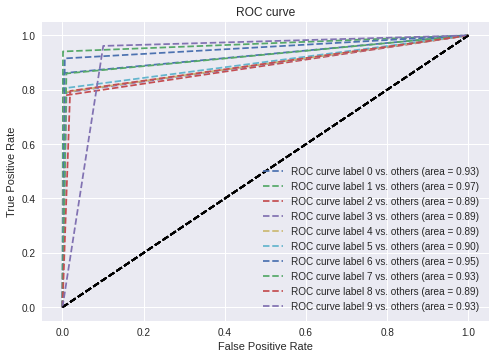

In [ ]:
y_test, y_pred, y_probabilities = main(pca_reduction=False, cross_validiation=False,\
                      n_component_pca='', classifier='DT', SVM_kernel='',\
                      train_images=train_images, train_labels=train_labels,\
                      test_images=test_images, test_labels=test_labels)
report_DT, auc_score_DT, accuracy_DT = evaluate_classifier(y_test, y_pred)

In [ ]:
print("accuracy : ", accuracy_DT)

accuracy :  0.8516


In [ ]:
report_DT

,precision,recall,f1-score,support
0,0.971231,0.861224,0.912926,980
1,0.989805,0.940969,0.96477,1135
2,0.945882,0.77907,0.85441,1032
3,0.899662,0.790099,0.841328,1010
4,0.948718,0.791242,0.862854,982
5,0.921795,0.806054,0.860048,892
6,0.945043,0.915449,0.930011,958
7,0.91134,0.859922,0.884885,1028
8,0.820106,0.795688,0.807712,974
9,0.517886,0.961348,0.673144,1009


In [ ]:
auc_score_DT

,class,AUC Score
0,0,0.929226
1,1,0.969864
2,2,0.886970
3,3,0.890100
4,4,0.893293
5,5,0.899678
6,6,0.954904
7,7,0.925168
8,8,0.888427
9,9,0.930457


###100 feature(PCA), Decision Tree


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:502: RuntimeWarning: invalid value encountered in true_divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


training time 234.37700271606445 second

confusion_matrix



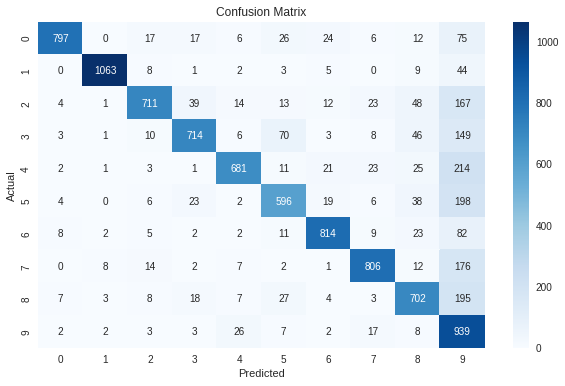


----- ROC corve------



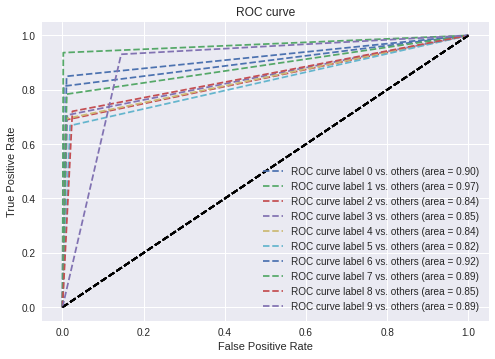

In [ ]:
y_test, y_pred, _ = main(pca_reduction=True, cross_validiation=False, \
                      n_component_pca=100, classifier='DT', SVM_kernel='',\
                      train_images=train_images, train_labels=train_labels,\
                      test_images=test_images, test_labels=test_labels)
report_DT_100, auc_score_DT_100, accuracy_DT_100 = evaluate_classifier(y_test, y_pred)

In [ ]:
print("accuracy : ", accuracy_DT_100)

accuracy :  0.7823


In [ ]:
report_DT_100

,precision,recall,f1-score,support
0,0.963724,0.813265,0.882125,980
1,0.983349,0.936564,0.959386,1135
2,0.905732,0.688953,0.782609,1032
3,0.870732,0.706931,0.780328,1010
4,0.904382,0.693483,0.785014,982
5,0.778068,0.668161,0.718938,892
6,0.899448,0.849687,0.873859,958
7,0.894562,0.784047,0.835666,1028
8,0.760563,0.720739,0.740116,974
9,0.419384,0.930624,0.578202,1009


In [ ]:
auc_score_DT_100

,class,AUC Score
0,0,0.904970
1,1,0.967267
2,2,0.840351
3,3,0.847570
4,4,0.842749
5,5,0.824748
6,6,0.919811
7,7,0.886729
8,8,0.848127
9,9,0.893018


###40 feature(PCA), Decision Tree

training time 70.76853942871094 second

confusion_matrix



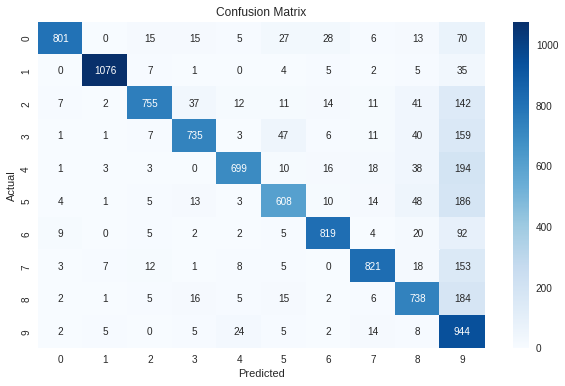


----- ROC corve------



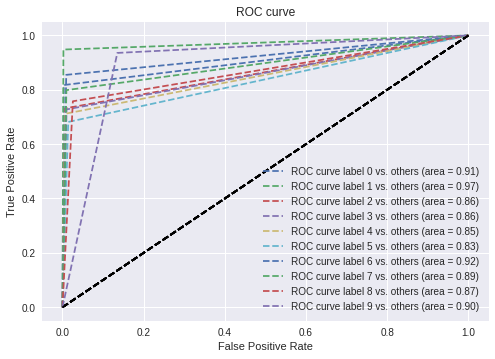

In [ ]:
y_test, y_pred, _ = main(pca_reduction=True, cross_validiation=False, n_component_pca=40,\
                      classifier='DT', SVM_kernel='',\
                      train_images=train_images, train_labels=train_labels,\
                      test_images=test_images, test_labels=test_labels)
report_DT_40, auc_score_DT_40, accuracy_DT_40 = evaluate_classifier(y_test, y_pred)

In [ ]:
print("accuracy : ", accuracy_DT_40)

accuracy :  0.7996


In [ ]:
report_DT_40

,precision,recall,f1-score,support
0,0.96506,0.817347,0.885083,980
1,0.981752,0.948018,0.96459,1135
2,0.927518,0.731589,0.817985,1032
3,0.890909,0.727723,0.80109,1010
4,0.918528,0.711813,0.802065,982
5,0.824966,0.681614,0.74647,892
6,0.907982,0.854906,0.880645,958
7,0.905182,0.798638,0.848579,1028
8,0.76161,0.7577,0.75965,974
9,0.437239,0.93558,0.59596,1009


#cross validation (Bonus)
The best results are obtained for the SVM model with the RBF kernel.
Cross-validation technique was used to obtain the average accuracy on this mode.
The average accuracy is almost the same in all cases.

In [ ]:
y_test, y_pred, y_probabilities = main(pca_reduction=True, cross_validiation=True, \
                      n_component_pca=100, classifier='SVM', SVM_kernel='rbf',\
                      train_images=train_images, train_labels=train_labels,\
                      test_images=test_images, test_labels=test_labels, k=5)

5 fold cross validation ,accuracy : 0.9846428571428572
acc_score ::  [0.9852142857142857, 0.9855, 0.9830714285714286, 0.9827142857142858, 0.9867142857142858]
training time 1073.331535577774 second


In [ ]:
y_test, y_pred, _ = main(pca_reduction=True, cross_validiation=True, \
                      n_component_pca=100, classifier='SVM', SVM_kernel='rbf',\
                      train_images=train_images, train_labels=train_labels,\
                      test_images=test_images, test_labels=test_labels, k=7)

7 fold cross validation ,accuracy : 0.9849285714285713
acc_score ::  [0.9852, 0.987, 0.9846, 0.9834, 0.9814, 0.9868, 0.9861]
training time 1349.7050807476044 second


In [ ]:
y_test, y_pred, y_probabilities = main(pca_reduction=True, cross_validiation=True, \
                      n_component_pca=100, classifier='SVM', SVM_kernel='rbf',\
                      train_images=train_images, train_labels=train_labels,\
                      test_images=test_images, test_labels=test_labels, k=10)

10 fold cross validation ,accuracy : 0.9857857142857143
acc_score ::  [0.9862857142857143, 0.9864285714285714, 0.9877142857142858, 0.9855714285714285, 0.9855714285714285, 0.9822857142857143, 0.9844285714285714, 0.9832857142857143, 0.9867142857142858, 0.9895714285714285]
training time 2004.1924889087677 second


# References

*   https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
*   https://stackoverflow.com/questions/52332897/how-to-extract-a-gz-file-in-python
*   https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
*   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
*   https://davidburn.github.io/notebooks/mnist-numbers/MNIST%20Handwrititten%20numbers/  
*   https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
